<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />


<br><h1>Regression Analysis - Apprentice Chef</h1>
<br><br>
Vinicius Yoshinaga Ishizaki<br>
<br><br>

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

In [40]:
# Importing libraries
import pandas as pd # data science essentials
import seaborn as sns # essential graphical output
import matplotlib.pyplot as plt # enhanced graphical output
import numpy as np # mathematical essentials
import statsmodels.formula.api as smf # regression modeling
import random
from sklearn.model_selection import train_test_split # train/test split
from sklearn.linear_model import LinearRegression # linear regression (scikit-learn)
import sklearn.linear_model
from sklearn import linear_model
from sklearn.neighbors import KNeighborsRegressor # KNN for Regression
from sklearn.preprocessing import StandardScaler # standard scaler


In [41]:
# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# specifying path and file name
file = './Apprentice_Chef_Dataset.xlsx'

# reading the file into Python
chef_df = pd.read_excel(io = file)

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<br><h2>Feature Engineering</h2>

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<h3>Understanding the dataset.</h3>
<br>
<h4>Exploring the dataset</h4>
<br>

In [42]:
# formatting and printing the dimensions of the dataset
print(f"""
Size of Original Dataset
------------------------
Observations: {chef_df.shape[0]}
Features:     {chef_df.shape[1]}
""")


Size of Original Dataset
------------------------
Observations: 1946
Features:     28



In [43]:
# Analyzing column names
chef_df.columns

Index(['REVENUE', 'CROSS_SELL_SUCCESS', 'NAME', 'EMAIL', 'FIRST_NAME', 'FAMILY_NAME', 'TOTAL_MEALS_ORDERED', 'UNIQUE_MEALS_PURCH', 'CONTACTS_W_CUSTOMER_SERVICE', 'PRODUCT_CATEGORIES_VIEWED', 'AVG_TIME_PER_SITE_VISIT', 'MOBILE_NUMBER', 'CANCELLATIONS_BEFORE_NOON', 'CANCELLATIONS_AFTER_NOON', 'TASTES_AND_PREFERENCES', 'PC_LOGINS', 'MOBILE_LOGINS', 'WEEKLY_PLAN', 'EARLY_DELIVERIES', 'LATE_DELIVERIES', 'PACKAGE_LOCKER', 'REFRIGERATED_LOCKER', 'AVG_PREP_VID_TIME', 'LARGEST_ORDER_SIZE', 'MASTER_CLASSES_ATTENDED', 'MEDIAN_MEAL_RATING', 'AVG_CLICKS_PER_VISIT', 'TOTAL_PHOTOS_VIEWED'], dtype='object')

In [44]:
# checking the first 5 rows of the dataset
chef_df.head(n = 5)

,REVENUE,CROSS_SELL_SUCCESS,NAME,EMAIL,FIRST_NAME,FAMILY_NAME,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,MOBILE_NUMBER,CANCELLATIONS_BEFORE_NOON,CANCELLATIONS_AFTER_NOON,TASTES_AND_PREFERENCES,PC_LOGINS,MOBILE_LOGINS,WEEKLY_PLAN,EARLY_DELIVERIES,LATE_DELIVERIES,PACKAGE_LOCKER,REFRIGERATED_LOCKER,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,MASTER_CLASSES_ATTENDED,MEDIAN_MEAL_RATING,AVG_CLICKS_PER_VISIT,TOTAL_PHOTOS_VIEWED
0,393.0,1,Saathos,saathos@unitedhealth.com,Saathos,Saathos,14,6,12,10,48.00,1,3,1,1,5,2,0,0,2,0,0,33.4,1,0,1,17,0
1,1365.0,1,Alysanne Osgrey,alysanne.osgrey@ge.org,Alysanne,Osgrey,87,3,8,8,40.35,1,0,0,1,5,1,12,0,2,0,0,84.8,1,0,3,13,170
2,800.0,1,Edwyd Fossoway,edwyd.fossoway@jnj.com,Edwyd,Fossoway,15,7,11,5,19.77,1,3,0,1,6,1,1,0,1,0,0,63.0,1,0,2,16,0
3,600.0,1,Eleyna Westerling,eleyna.westerling@ge.org,Eleyna,Westerling,13,6,11,5,90.00,1,2,0,1,6,1,14,0,3,0,0,43.8,1,0,2,14,0
4,1490.0,1,Elyn Norridge,elyn.norridge@jnj.com,Elyn,Norridge,47,8,6,10,40.38,1,0,0,0,5,1,5,0,8,0,0,84.8,1,1,3,12,205


In [45]:
# Getting information of the variable types to classify the columns
chef_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1946 entries, 0 to 1945
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   REVENUE                      1946 non-null   float64
 1   CROSS_SELL_SUCCESS           1946 non-null   int64  
 2   NAME                         1946 non-null   object 
 3   EMAIL                        1946 non-null   object 
 4   FIRST_NAME                   1946 non-null   object 
 5   FAMILY_NAME                  1899 non-null   object 
 6   TOTAL_MEALS_ORDERED          1946 non-null   int64  
 7   UNIQUE_MEALS_PURCH           1946 non-null   int64  
 8   CONTACTS_W_CUSTOMER_SERVICE  1946 non-null   int64  
 9   PRODUCT_CATEGORIES_VIEWED    1946 non-null   int64  
 10  AVG_TIME_PER_SITE_VISIT      1946 non-null   float64
 11  MOBILE_NUMBER                1946 non-null   int64  
 12  CANCELLATIONS_BEFORE_NOON    1946 non-null   int64  
 13  CANCELLATIONS_AFTE

In [46]:
# descriptive statistics for numeric data
chef_df.describe(include = 'number').round(2)

,REVENUE,CROSS_SELL_SUCCESS,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,MOBILE_NUMBER,CANCELLATIONS_BEFORE_NOON,CANCELLATIONS_AFTER_NOON,TASTES_AND_PREFERENCES,PC_LOGINS,MOBILE_LOGINS,WEEKLY_PLAN,EARLY_DELIVERIES,LATE_DELIVERIES,PACKAGE_LOCKER,REFRIGERATED_LOCKER,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,MASTER_CLASSES_ATTENDED,MEDIAN_MEAL_RATING,AVG_CLICKS_PER_VISIT,TOTAL_PHOTOS_VIEWED
count,1946.00,1946.00,1946.00,1946.0,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00
mean,2107.29,0.68,74.63,4.9,6.98,5.38,99.60,0.88,1.40,0.17,0.71,5.52,1.48,11.33,1.49,2.97,0.36,0.11,150.56,4.44,0.60,2.79,13.51,106.43
std,1138.29,0.47,55.31,2.5,2.28,3.04,62.34,0.33,1.55,0.43,0.45,0.58,0.53,13.57,2.32,2.74,0.48,0.32,49.45,1.55,0.64,0.76,2.33,181.01
min,131.00,0.00,11.00,1.0,1.00,1.00,10.33,0.00,0.00,0.00,0.00,4.00,0.00,0.00,0.00,0.00,0.00,0.00,33.40,1.00,0.00,1.00,5.00,0.00
25%,1350.00,0.00,39.00,3.0,5.00,3.00,72.00,1.00,0.00,0.00,0.00,5.00,1.00,1.00,0.00,1.00,0.00,0.00,114.40,3.00,0.00,2.00,12.00,0.00
50%,1740.00,1.00,60.00,5.0,7.00,5.00,94.16,1.00,1.00,0.00,1.00,6.00,1.00,7.00,0.00,2.00,0.00,0.00,145.60,4.00,1.00,3.00,13.00,0.00
75%,2670.00,1.00,95.00,7.0,8.00,8.00,117.29,1.00,2.00,0.00,1.00,6.00,2.00,13.00,3.00,4.00,1.00,0.00,173.78,5.00,1.00,3.00,15.00,174.00
max,8793.75,1.00,493.00,19.0,18.00,10.00,1645.60,1.00,13.00,3.00,1.00,7.00,3.00,52.00,9.00,19.00,1.00,1.00,564.20,11.00,3.00,5.00,19.00,1600.00


To our variable selection we analyzed and sort the column names by type, as follows:

<strong>CONTINUOUS</strong>

'REVENUE'  (Y-variable)
'TOTAL_MEALS_ORDERED'
'CONTACTS_W_CUSTOMER_SERVICE'
'CANCELLATIONS_BEFORE_NOON'
'CANCELLATIONS_AFTER_NOON'
'WEEKLY_PLAN'
'EARLY_DELIVERIES'
'LATE_DELIVERIES'
'AVG_PREP_VID_TIME'
'LARGEST_ORDER_SIZE'
'MASTER_CLASSES_ATTENDED'
'AVG_CLICKS_PER_VISIT'
'TOTAL_PHOTOS_VIEWED'

<strong>INTERVAL/COUNT</strong>

'CROSS_SELL_SUCCESS'
'UNIQUE_MEALS_PURCH'
'PRODUCT_CATEGORIES_VIEWED'
'TASTES_AND_PREFERENCES'
'PC_LOGINS'
'MOBILE_LOGINS'
'PACKAGE_LOCKER'
'REFRIGERATED_LOCKER'
'MEDIAN_MEAL_RATING'

<strong>CATEGORICAL</strong>

'NAME'
'EMAIL' ()
'FIRST_NAME'
'FAMILY_NAME'
'MOBILE_NUMBER'

In [47]:
# We identified that the column LARGEST_ORDER_SIZE is actually the AVERAGE number of meals ordered per customer
# So we renamed this column to AVG_MEALS_PER_CUSTOMER
chef_df.rename(columns={'LARGEST_ORDER_SIZE': 'AVG_MEALS_PER_CUSTOMER'}, inplace=True)

<br>
<h4>Conclusion</h4>
Based on the information presented above, we identified our response variable, which is the column REVENUE.
<br>

In [48]:
# Checking null values
chef_df.isnull().sum().sort_values(ascending=False)

FAMILY_NAME                    47
REVENUE                         0
PC_LOGINS                       0
AVG_CLICKS_PER_VISIT            0
MEDIAN_MEAL_RATING              0
MASTER_CLASSES_ATTENDED         0
AVG_MEALS_PER_CUSTOMER          0
AVG_PREP_VID_TIME               0
REFRIGERATED_LOCKER             0
PACKAGE_LOCKER                  0
LATE_DELIVERIES                 0
EARLY_DELIVERIES                0
WEEKLY_PLAN                     0
MOBILE_LOGINS                   0
TASTES_AND_PREFERENCES          0
CROSS_SELL_SUCCESS              0
CANCELLATIONS_AFTER_NOON        0
CANCELLATIONS_BEFORE_NOON       0
MOBILE_NUMBER                   0
AVG_TIME_PER_SITE_VISIT         0
PRODUCT_CATEGORIES_VIEWED       0
CONTACTS_W_CUSTOMER_SERVICE     0
UNIQUE_MEALS_PURCH              0
TOTAL_MEALS_ORDERED             0
FIRST_NAME                      0
EMAIL                           0
NAME                            0
TOTAL_PHOTOS_VIEWED             0
dtype: int64

In [49]:
# Only Family Name had null values, but as we do not plan to use this variable, this won't impact our analysis.

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<br>
<h3>Analyzing the distribution of our y-variable</h3>
<br>

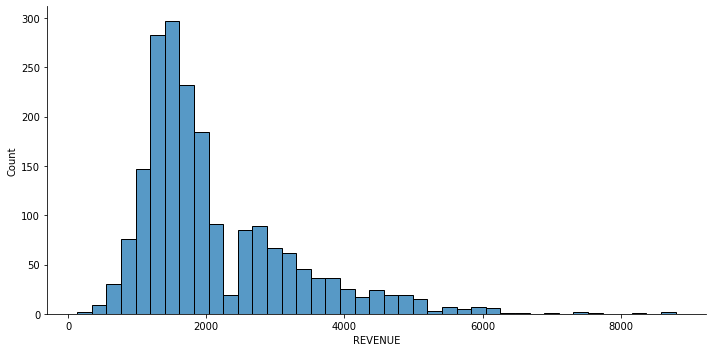

In [50]:
# developing a histogram using DISPLOT
sns.displot(data   = chef_df,
            x      = 'REVENUE',
            height = 5,
            aspect = 2)

# displaying the histogram
plt.show()

In [51]:
# log transforming REVENUE and saving it to the dataset
chef_df['log_REVENUE'] = np.log10(chef_df['REVENUE'])

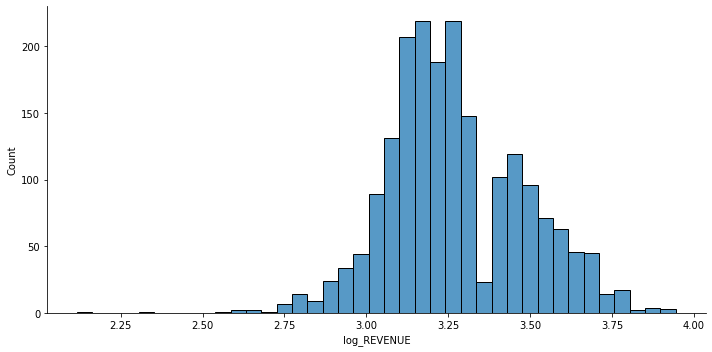

In [52]:
# developing a histogram using DISPLOT for the log version of the revenue (y-variable)
sns.displot(data   = chef_df,
            x      = 'log_REVENUE',
            height = 5,
            aspect = 2)

# displaying the histogram
plt.show()

<br>
<h4>Conclusion</h4>
The log version of revenue seems to be closer to a normal distribution.
<br>

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>
<h3>Analyzing Trend Based Features</h3><br>

In [53]:
########################
# Visual EDA (Scatterplots)
########################

# setting figure size
random_colors = ['g', 'r', 'y', 'orange']

# Creating function to display scatterplots
def show_scatter(df, x_var, y_var):
    fig, ax = plt.subplots(figsize = (10, 8))
    plt.subplot(2, 2, 1)
    sns.scatterplot(x = df[x_var],
                    y = df[y_var],
                    color = random.choice(random_colors))
    plt.xlabel(xlabel = x_var)
    plt.ylabel(ylabel = y_var)
    plt.tight_layout()
    plt.show()

# Creating a list of x_variables to be displaed on the scatterplot:
scatter_variable_list = ['TOTAL_MEALS_ORDERED', 'UNIQUE_MEALS_PURCH', 'CONTACTS_W_CUSTOMER_SERVICE', 
                         'PRODUCT_CATEGORIES_VIEWED', 'AVG_TIME_PER_SITE_VISIT', 'CANCELLATIONS_BEFORE_NOON', 
                         'CANCELLATIONS_AFTER_NOON', 'TASTES_AND_PREFERENCES', 'PC_LOGINS', 'MOBILE_LOGINS', 
                         'WEEKLY_PLAN', 'EARLY_DELIVERIES', 'LATE_DELIVERIES', 'PACKAGE_LOCKER', 
                         'REFRIGERATED_LOCKER', 'AVG_PREP_VID_TIME', 'AVG_MEALS_PER_CUSTOMER', 'MASTER_CLASSES_ATTENDED',
                         'MEDIAN_MEAL_RATING', 'AVG_CLICKS_PER_VISIT', 'TOTAL_PHOTOS_VIEWED']

continuous_variables = ['TOTAL_MEALS_ORDERED', 'AVG_TIME_PER_SITE_VISIT', 'WEEKLY_PLAN', 'AVG_PREP_VID_TIME', 
                        'TOTAL_PHOTOS_VIEWED']

interval_variables = ['UNIQUE_MEALS_PURCH', 'CONTACTS_W_CUSTOMER_SERVICE', 'PRODUCT_CATEGORIES_VIEWED',
                      'CANCELLATIONS_BEFORE_NOON', 'CANCELLATIONS_AFTER_NOON', 'PC_LOGINS', 'MOBILE_LOGINS', 
                      'EARLY_DELIVERIES', 'LATE_DELIVERIES', 'AVG_MEALS_PER_CUSTOMER', 'MASTER_CLASSES_ATTENDED',
                      'MEDIAN_MEAL_RATING', 'AVG_CLICKS_PER_VISIT']

# Setting y_variable
y_variable = 'REVENUE'

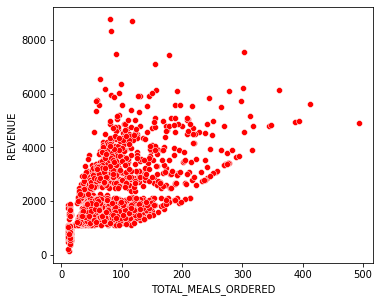

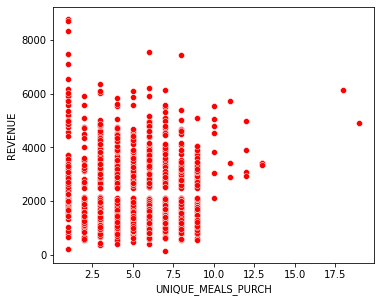

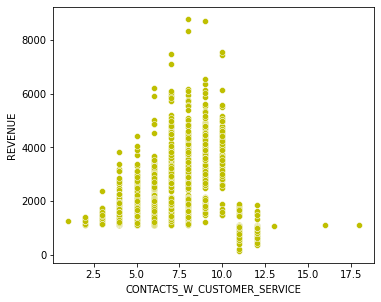

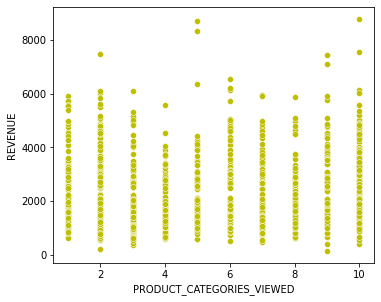

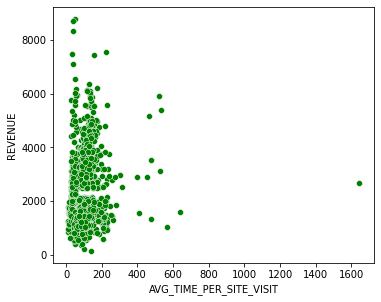

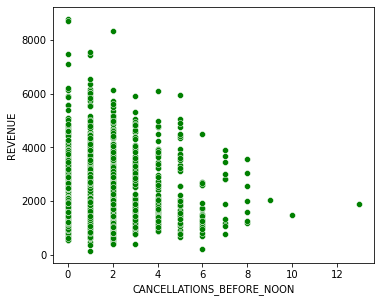

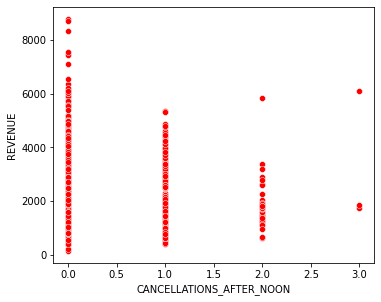

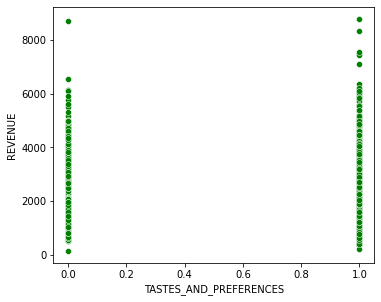

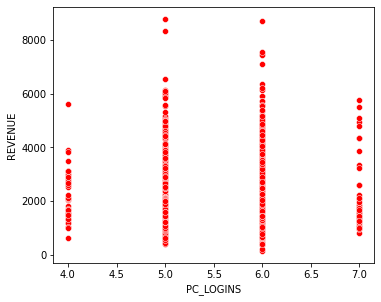

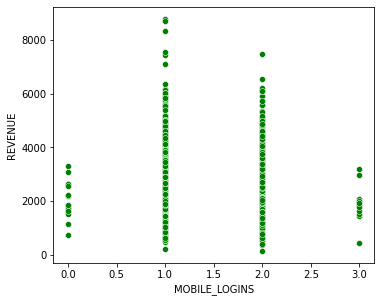

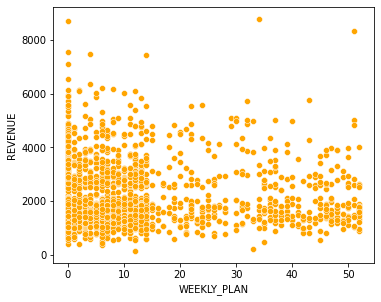

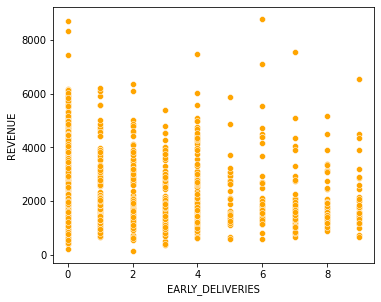

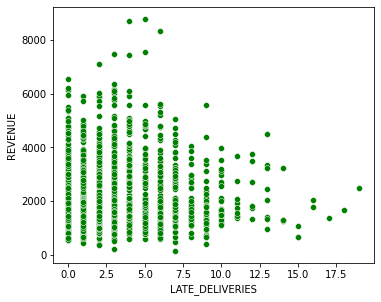

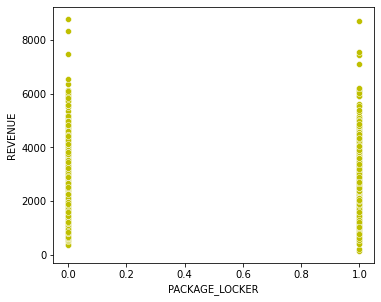

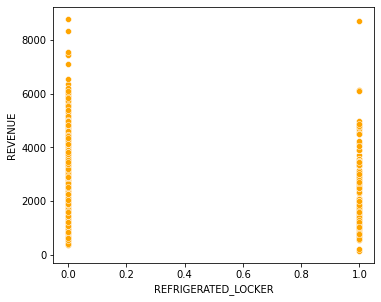

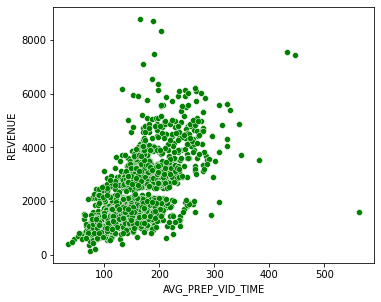

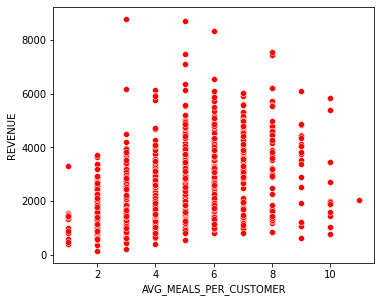

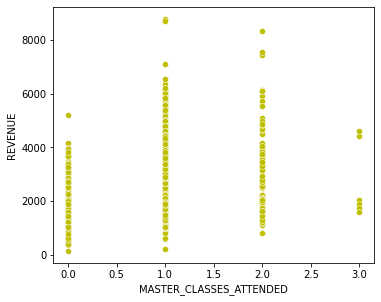

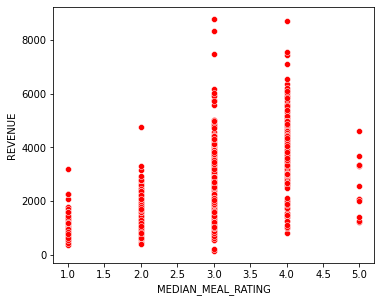

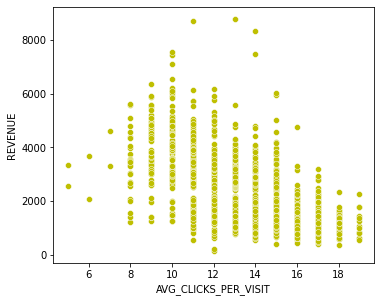

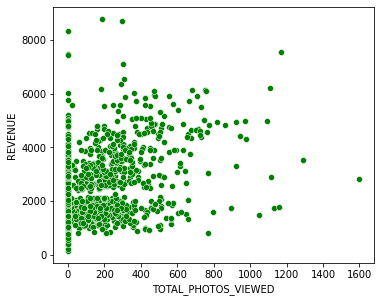

In [54]:
# Displaying continuous variables on the scatters in a for loop

for x_var in scatter_variable_list:
    show_scatter(chef_df, x_var, y_variable)

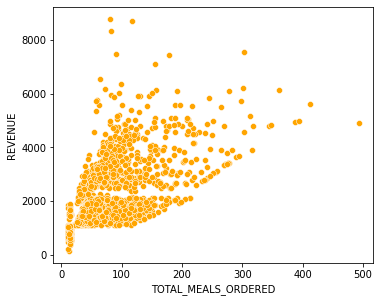

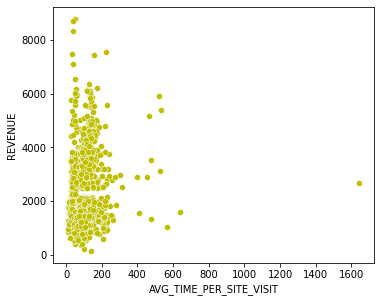

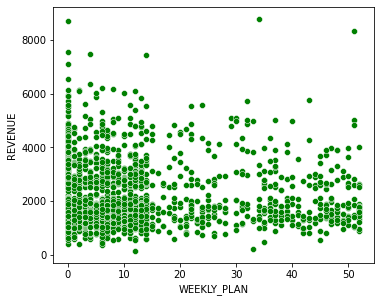

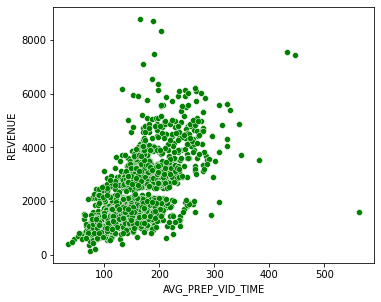

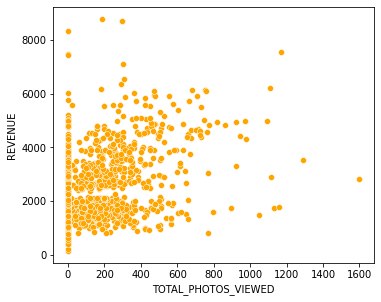

In [55]:
# Displaying continuous variables on the scatters in a for loop

for x_var in continuous_variables:
    show_scatter(chef_df, x_var, y_variable)

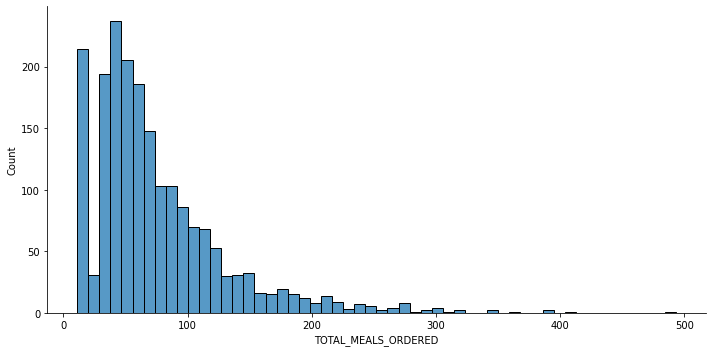

In [56]:
# developing a histogram using DISPLOT
sns.displot(data   = chef_df,
            x      = 'TOTAL_MEALS_ORDERED',
            height = 5,
            aspect = 2)

# displaying the histogram
plt.show()

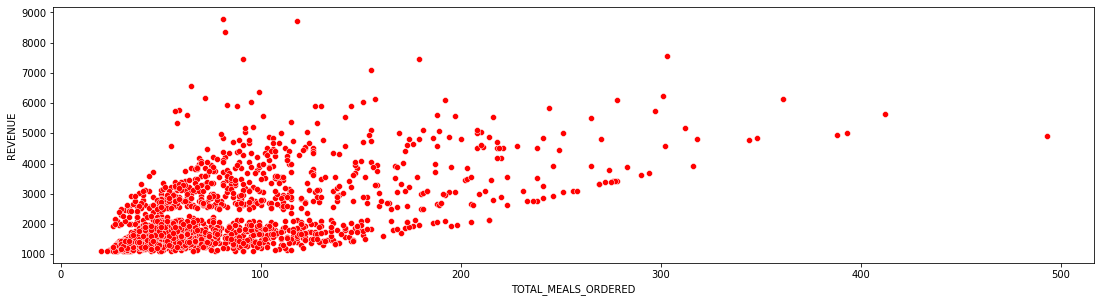

In [57]:
chef_df[chef_df['REVENUE'] < 2000]

# show_scatter(chef_df, 'TOTAL_MEALS_ORDERED', 'REVENUE')
fig, ax = plt.subplots(figsize = (30, 8))
plt.subplot(2, 2, 1)
sns.scatterplot(x = chef_df[chef_df['TOTAL_MEALS_ORDERED'] > 16]['TOTAL_MEALS_ORDERED'],
                y = chef_df['REVENUE'],
                color = random.choice(random_colors))
plt.xlabel(xlabel = 'TOTAL_MEALS_ORDERED')
plt.ylabel(ylabel = 'REVENUE')
plt.tight_layout()
plt.show()

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

From the scatter plots above, it is evident that there are several features have a high amount of zero values. Let's explore further by analyzing how many observations are affected by these phenomenon.
<br><br>
<strong>Basic Rule for Flag-Based Feature Engineering</strong>

* At least 100 observations must be on both sides of the flag (1s and 0s)

<br>
<h4>a) Use subsetting to check the value counts for all variables that appear to have a large amount of zero values.</h4>

In [58]:
# counting the number of zeroes

total_observations = len(chef_df)
variables_to_be_analyzed = ['TOTAL_MEALS_ORDERED', 'AVG_TIME_PER_SITE_VISIT', 'WEEKLY_PLAN', 'TOTAL_PHOTOS_VIEWED']

total_meals_zeroes   = len(chef_df['TOTAL_MEALS_ORDERED'][chef_df['TOTAL_MEALS_ORDERED'] == 0])
avg_time_per_site_visit_zeroes     = len(chef_df['AVG_TIME_PER_SITE_VISIT'][chef_df['AVG_TIME_PER_SITE_VISIT'] == 0])
weekly_plan_zeroes = len(chef_df['WEEKLY_PLAN'][chef_df['WEEKLY_PLAN'] == 0])
total_photos_viewed_zeroes   = len(chef_df['TOTAL_PHOTOS_VIEWED'][chef_df['TOTAL_PHOTOS_VIEWED'] == 0])


## the table below has been coded for you ##

# printing a table of the results

print(f"""
                                No\t\tYes
                                ---------------------
Total Meals Ordered           | {total_meals_zeroes}\t\t{total_observations - total_meals_zeroes}
Average Time Per Site Visit   | {avg_time_per_site_visit_zeroes}\t\t{total_observations - avg_time_per_site_visit_zeroes}
Weekly Plan                   | {weekly_plan_zeroes}\t\t{total_observations - weekly_plan_zeroes}
Total Photos Viewed           | {total_photos_viewed_zeroes}\t\t{total_observations - total_photos_viewed_zeroes}
""")


                                No		Yes
                                ---------------------
Total Meals Ordered           | 0		1946
Average Time Per Site Visit   | 0		1946
Weekly Plan                   | 468		1478
Total Photos Viewed           | 1140		806



<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

Based on the table above, engineer flag features for all variables that have at least 100 observations in both the 'yes' and 'no' columns.

In [59]:
# creating dummy variables:
chef_df['dummy_subscribe_to_weekly_plan']   = 0
chef_df['dummy_view_photos']      = 0


# iterating over each original column to
# change values in the new feature columns
for index, value in chef_df.iterrows(): #iterates over rows and columns
        
    # Weekly plan
    if chef_df.loc[index, 'WEEKLY_PLAN'] > 0:
        chef_df.loc[index, 'dummy_subscribe_to_weekly_plan'] = 1
        
        
    # Total photos viewed
    if chef_df.loc[index, 'TOTAL_PHOTOS_VIEWED'] > 0:
        chef_df.loc[index, 'dummy_view_photos'] = 1

In [60]:
# checking results
chef_df[['dummy_subscribe_to_weekly_plan', 'dummy_view_photos']].head()

,dummy_subscribe_to_weekly_plan,dummy_view_photos
0,0,0
1,1,1
2,1,0
3,1,0
4,1,1


<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

Checking correlation of the new variables

In [61]:
# developing a small correlation matrix
zeroes_corr = chef_df.corr()    # .round(decimals = 2)


# checking the correlations of the newly-created variables with Sale_Price
zeroes_corr.loc['REVENUE',                                   # Y-variable
               ['WEEKLY_PLAN','dummy_subscribe_to_weekly_plan', 'TOTAL_PHOTOS_VIEWED', 
                'dummy_view_photos']] \
                .sort_values(ascending = False)

TOTAL_PHOTOS_VIEWED               0.465951
dummy_view_photos                 0.372072
WEEKLY_PLAN                       0.009794
dummy_subscribe_to_weekly_plan   -0.032196
Name: REVENUE, dtype: float64

In [62]:
# STEP 1: splitting personal emails

# placeholder list
placeholder_lst = []

# looping over each email address
for index, col in chef_df.iterrows():
    
    # splitting email domain at '@'
    split_email = chef_df.loc[index, 'EMAIL'].split(sep = '@')
    
    # appending placeholder_lst with the results
    placeholder_lst.append(split_email)
    

# converting placeholder_lst into a DataFrame 
email_df = pd.DataFrame(placeholder_lst)


# displaying the results
email_df

,0,1
0,saathos,unitedhealth.com
1,alysanne.osgrey,ge.org
2,edwyd.fossoway,jnj.com
3,eleyna.westerling,ge.org
4,elyn.norridge,jnj.com
...,...,...
1941,obara.sand,yahoo.com
1942,quentyn.blackwood,yahoo.com
1943,rhonda.rowan,gmail.com
1944,turnip,yahoo.com


In [63]:
# STEP 2: concatenating with original DataFrame

# renaming column to concatenate
email_df.columns = ['0' , 'email_domain'] # We don't need the first column


# concatenating personal_email_domain with friends DataFrame
chef_df = pd.concat([chef_df, email_df['email_domain']],
                   axis = 1)


# printing value counts of personal_email_domain
chef_df.loc[: ,'email_domain'].value_counts()

gmail.com           303
protonmail.com      284
yahoo.com           274
msn.com              72
aol.com              69
passport.com         64
hotmail.com          63
live.com             62
me.com               59
amex.com             30
jnj.com              28
cocacola.com         28
merck.com            28
mcdonalds.com        28
nike.com             27
apple.com            27
ibm.com              26
ge.org               26
dupont.com           26
microsoft.com        25
chevron.com          25
travelers.com        24
exxon.com            24
unitedhealth.com     24
boeing.com           23
mmm.com              22
verizon.com          22
caterpillar.com      22
pg.com               22
disney.com           21
walmart.com          21
visa.com             20
pfizer.com           20
jpmorgan.com         19
unitedtech.com       18
cisco.com            18
goldmansacs.com      18
homedepot.com        17
intel.com            17
Name: email_domain, dtype: int64

In [64]:
# email domain types
personal_email_domains = ['@gmail.com', '@yahoo.com', '@protonmail.com']
junk_email_domains  = ['@me.com', '@aol.com', '@hotmail.com', '@live.com', '@msn.com', '@passport.com']


# placeholder list
placeholder_lst = []


# looping to group observations by domain type
for domain in chef_df['email_domain']:
        if '@' + domain in personal_email_domains:
            placeholder_lst.append('personal')
        elif '@' + domain in junk_email_domains:
            placeholder_lst.append('junk')
        else:
            placeholder_lst.append('professional')


# concatenating with original DataFrame
chef_df['email_domain_group'] = pd.Series(placeholder_lst)


# checking results
chef_df['email_domain_group'].value_counts()



personal        861
professional    696
junk            389
Name: email_domain_group, dtype: int64

In [65]:
# Creating email domain dummy
chef_df['dummy_junk_email']   = 0
chef_df['dummy_professional_email']      = 0


# iterating over each original column to change values in the new feature columns
for index, value in chef_df.iterrows(): #iterates over rows and columns
        
    # Junk Email
    if chef_df.loc[index, 'email_domain_group'] == 'junk':
        chef_df.loc[index, 'dummy_junk_email'] = 1
        
        
    # Personal Email
    if chef_df.loc[index, 'email_domain_group'] == 'professional':
        chef_df.loc[index, 'dummy_professional_email'] = 1
        
# checking results
chef_df[['dummy_junk_email', 'dummy_professional_email']].head()

,dummy_junk_email,dummy_professional_email
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1



<br>
<h4>Based on the correlations analyzed, the dummy variables did not improve the correlations.</h4>

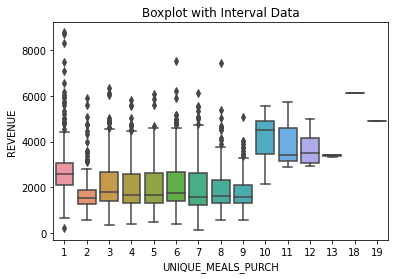

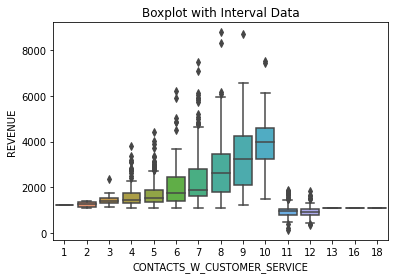

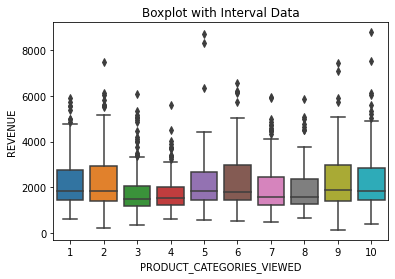

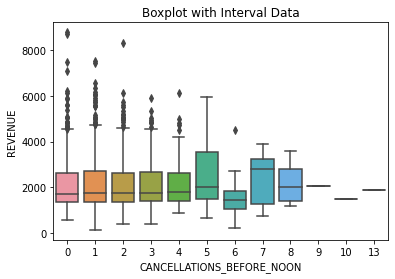

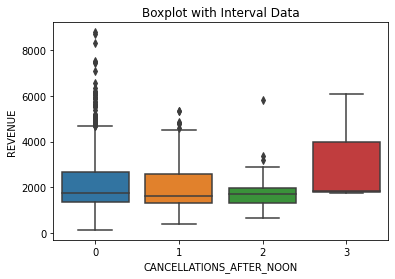

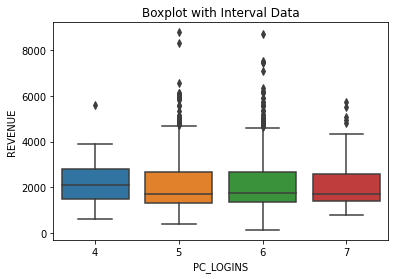

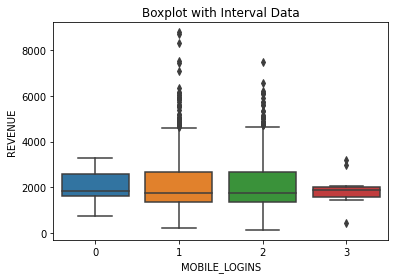

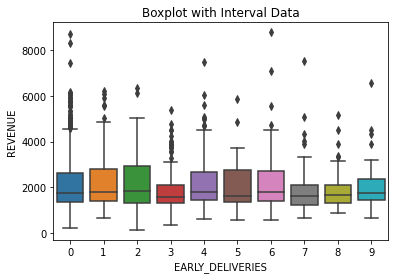

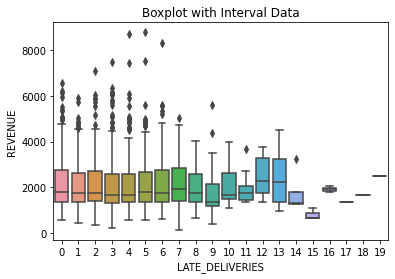

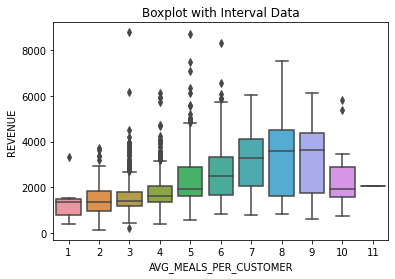

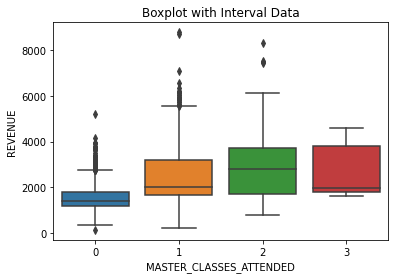

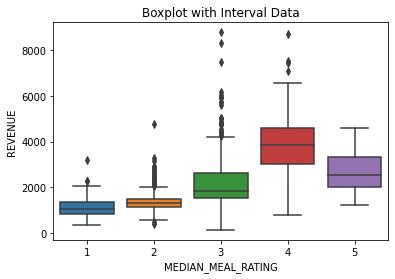

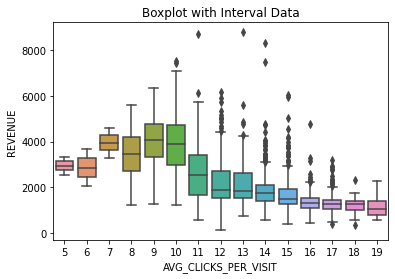

In [66]:
########################
# Visual EDA (Boxplots)
########################

# setting figure size
# fig, ax = plt.subplots(figsize = (10, 8))


# Creating function to display boxplots
def show_boxplot(df, x_var, y_var):
    sns.boxplot(x    = df[x_var],
                y    = df[y_var],
                data = df)
    
    plt.title(label   = 'Boxplot with Interval Data')
    plt.xlabel(xlabel = x_var)
    plt.ylabel(ylabel = y_var)
    plt.show()


interval_variables = ['UNIQUE_MEALS_PURCH', 'CONTACTS_W_CUSTOMER_SERVICE', 'PRODUCT_CATEGORIES_VIEWED',
                      'CANCELLATIONS_BEFORE_NOON', 'CANCELLATIONS_AFTER_NOON', 'PC_LOGINS', 'MOBILE_LOGINS', 
                      'EARLY_DELIVERIES', 'LATE_DELIVERIES', 'AVG_MEALS_PER_CUSTOMER', 'MASTER_CLASSES_ATTENDED',
                      'MEDIAN_MEAL_RATING', 'AVG_CLICKS_PER_VISIT']

# Setting y_variable
y_variable = 'REVENUE'




# Displaying continuous variables on the scatters in a for loop

for x_var in interval_variables:
    show_boxplot(chef_df, x_var, y_variable)

In [67]:
#Log transformation on the new dataset
# Creating logs
chef_df['log_REVENUE'] = np.log10(chef_df['REVENUE'])

chef_df['log_CONTACTS_W_CUSTOMER_SERVICE'] = np.log10(chef_df['CONTACTS_W_CUSTOMER_SERVICE']).round(4)
chef_df['log_AVG_MEALS_PER_CUSTOMER'] = np.log10(chef_df['AVG_MEALS_PER_CUSTOMER']).round(4)
chef_df['log_MASTER_CLASSES_ATTENDED'] = np.log10(chef_df['MASTER_CLASSES_ATTENDED']).round(4)
chef_df['log_MEDIAN_MEAL_RATING'] = np.log10(chef_df['MEDIAN_MEAL_RATING']).round(4)
chef_df['log_AVG_CLICKS_PER_VISIT'] = np.log10(chef_df['AVG_CLICKS_PER_VISIT']).round(4)


log_corr = chef_df.loc[ : , ['CONTACTS_W_CUSTOMER_SERVICE','log_CONTACTS_W_CUSTOMER_SERVICE',
                             'AVG_MEALS_PER_CUSTOMER','log_AVG_MEALS_PER_CUSTOMER',
                             'MASTER_CLASSES_ATTENDED','log_MASTER_CLASSES_ATTENDED',
                             'MEDIAN_MEAL_RATING','log_MEDIAN_MEAL_RATING',
                             'AVG_CLICKS_PER_VISIT','log_AVG_CLICKS_PER_VISIT',
                             'REVENUE', 'log_REVENUE']].corr(method = 'pearson')\
                                                        .round(decimals = 2)



log_corr.loc[ ['CONTACTS_W_CUSTOMER_SERVICE','log_CONTACTS_W_CUSTOMER_SERVICE','AVG_MEALS_PER_CUSTOMER',
               'log_AVG_MEALS_PER_CUSTOMER','MASTER_CLASSES_ATTENDED','log_MASTER_CLASSES_ATTENDED',
               'MEDIAN_MEAL_RATING','log_MEDIAN_MEAL_RATING','AVG_CLICKS_PER_VISIT','log_AVG_CLICKS_PER_VISIT'],
              ['REVENUE', 'log_REVENUE']    ]



/Users/vinicius/opt/anaconda3/lib/python3.7/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


,REVENUE,log_REVENUE
CONTACTS_W_CUSTOMER_SERVICE,0.10,-0.04
log_CONTACTS_W_CUSTOMER_SERVICE,0.17,0.05
AVG_MEALS_PER_CUSTOMER,0.44,0.45
log_AVG_MEALS_PER_CUSTOMER,0.42,0.45
MASTER_CLASSES_ATTENDED,0.45,0.47
log_MASTER_CLASSES_ATTENDED,0.12,0.11
MEDIAN_MEAL_RATING,0.61,0.65
log_MEDIAN_MEAL_RATING,0.55,0.61
AVG_CLICKS_PER_VISIT,-0.55,-0.58
log_AVG_CLICKS_PER_VISIT,-0.56,-0.58


<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<strong>Comparing log transformation results</strong>

In [68]:
# Create log comparison graphs function

def get_log_comparison(df, var_x, log_var_x, var_y, log_var_y):
    # setting figure size
    fig, ax = plt.subplots(figsize = (15, 10))


    ## Plot 1: Original X, Original Y ##
    plt.subplot(2, 2, 1)

    sns.boxplot(x     = var_x,
                y     = var_y,
                data  = df)


    # titles and labels
    plt.title(label   = 'Original X, Original Y')
    plt.xlabel(xlabel = var_x)
    plt.ylabel(ylabel = var_y)



    ## Plot 2: Log X, Original Y ##
    plt.subplot(2, 2, 2)
    sns.boxplot(x     = log_var_x,
                y     = var_y,
                data  = df)


    # titles and labels
    plt.title(label   = 'Log X, Original Y')
    plt.xlabel(xlabel = log_var_x)
    plt.ylabel(ylabel = var_y)


    ## Plot 3: Original X, Log Y ##
    plt.subplot(2, 2, 3)
    sns.boxplot(x     = var_x,
                y     = log_var_y,
                data  = chef_df)


    # titles and labels
    plt.title(label   = 'Original X, Log Y')
    plt.xlabel(xlabel = var_x)
    plt.ylabel(ylabel = log_var_y)


    ## Plot 1: Log X, Log Y ##
    plt.subplot(2, 2, 4)
    sns.boxplot(x     = log_var_x,
                y     = log_var_y,
                data  = chef_df)


    # titles and labels
    plt.title(label   = 'Log X, Log Y')
    plt.xlabel(xlabel = log_var_x)
    plt.ylabel(ylabel = log_var_y)


    ## displaying the visuals ##
    plt.tight_layout()
    plt.show()

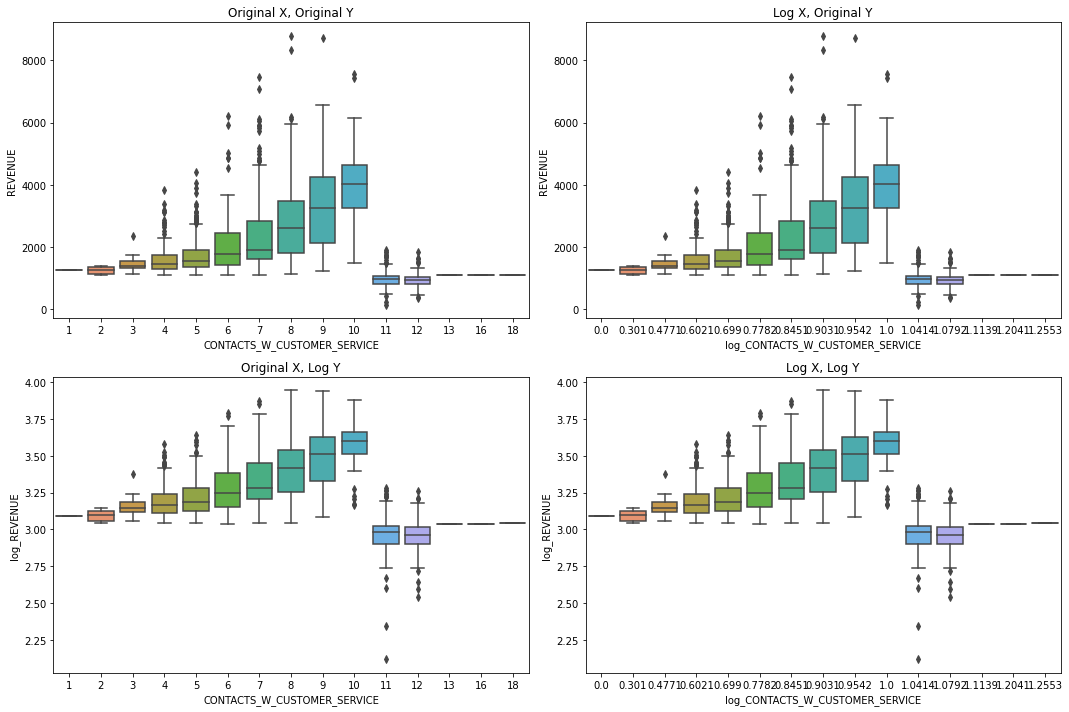

In [69]:
get_log_comparison(chef_df, 'CONTACTS_W_CUSTOMER_SERVICE', 'log_CONTACTS_W_CUSTOMER_SERVICE', 'REVENUE', 'log_REVENUE')

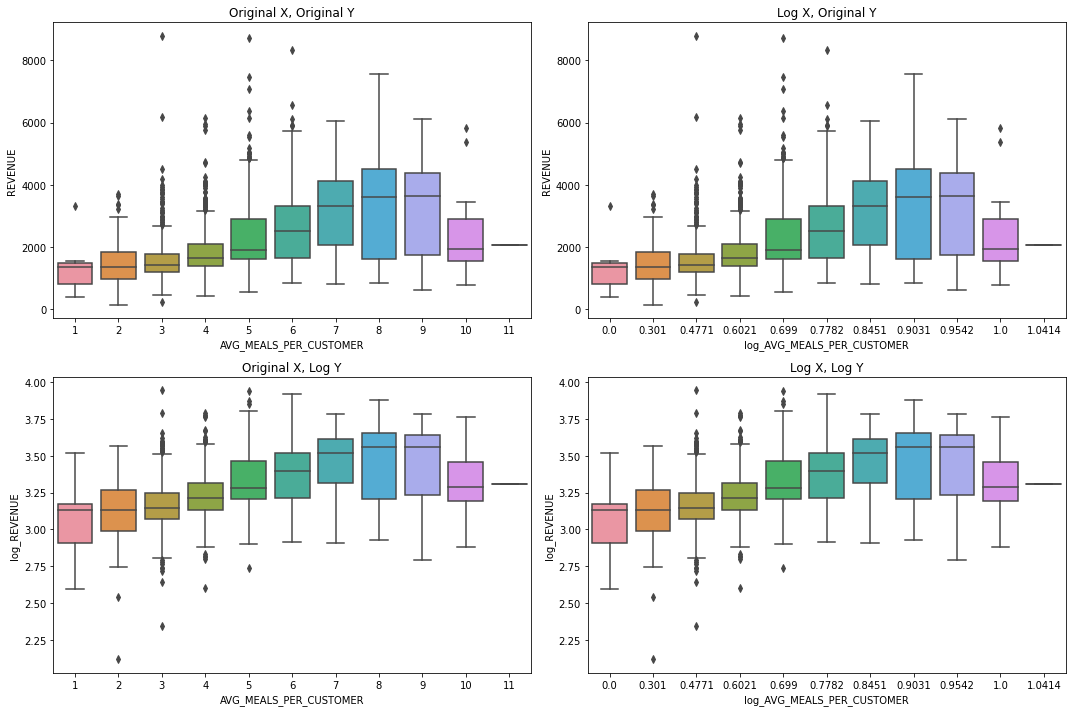

In [70]:
get_log_comparison(chef_df, 'AVG_MEALS_PER_CUSTOMER', 'log_AVG_MEALS_PER_CUSTOMER', 'REVENUE', 'log_REVENUE')

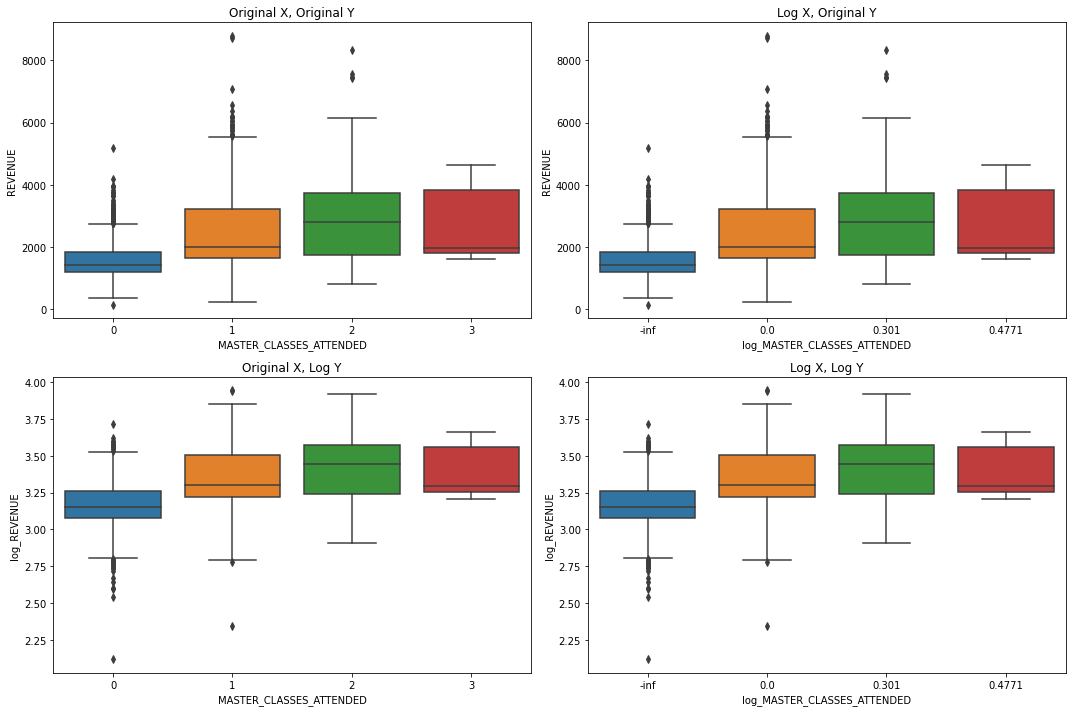

In [71]:
get_log_comparison(chef_df, 'MASTER_CLASSES_ATTENDED','log_MASTER_CLASSES_ATTENDED', 'REVENUE', 'log_REVENUE')

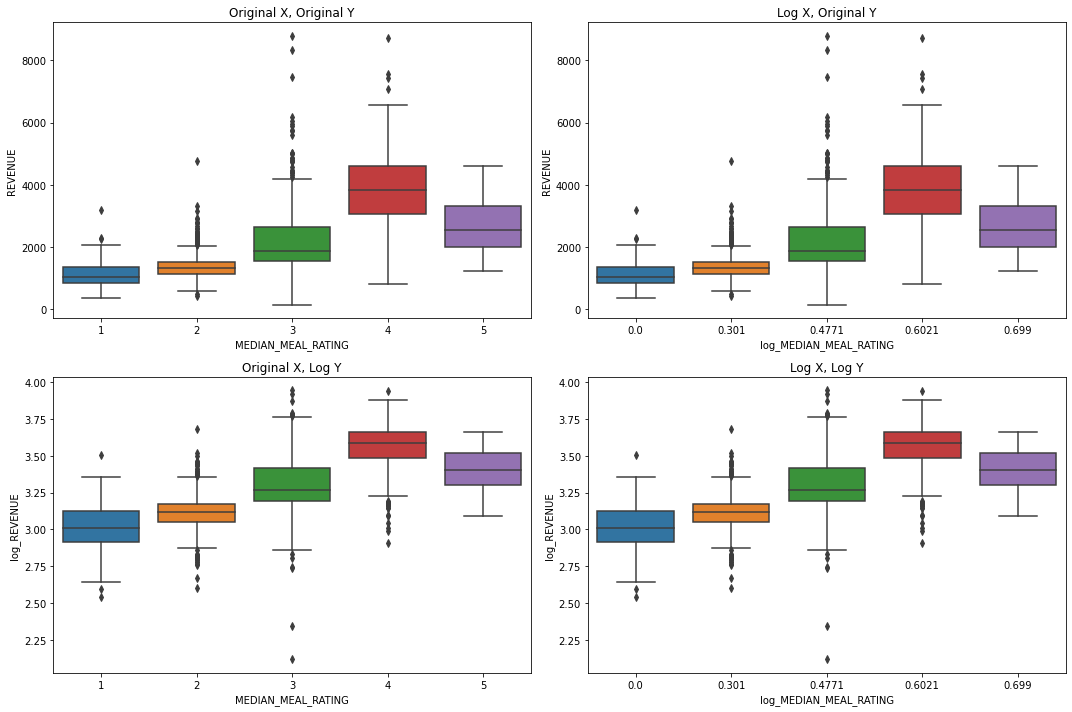

In [72]:
get_log_comparison(chef_df, 'MEDIAN_MEAL_RATING','log_MEDIAN_MEAL_RATING', 'REVENUE', 'log_REVENUE')

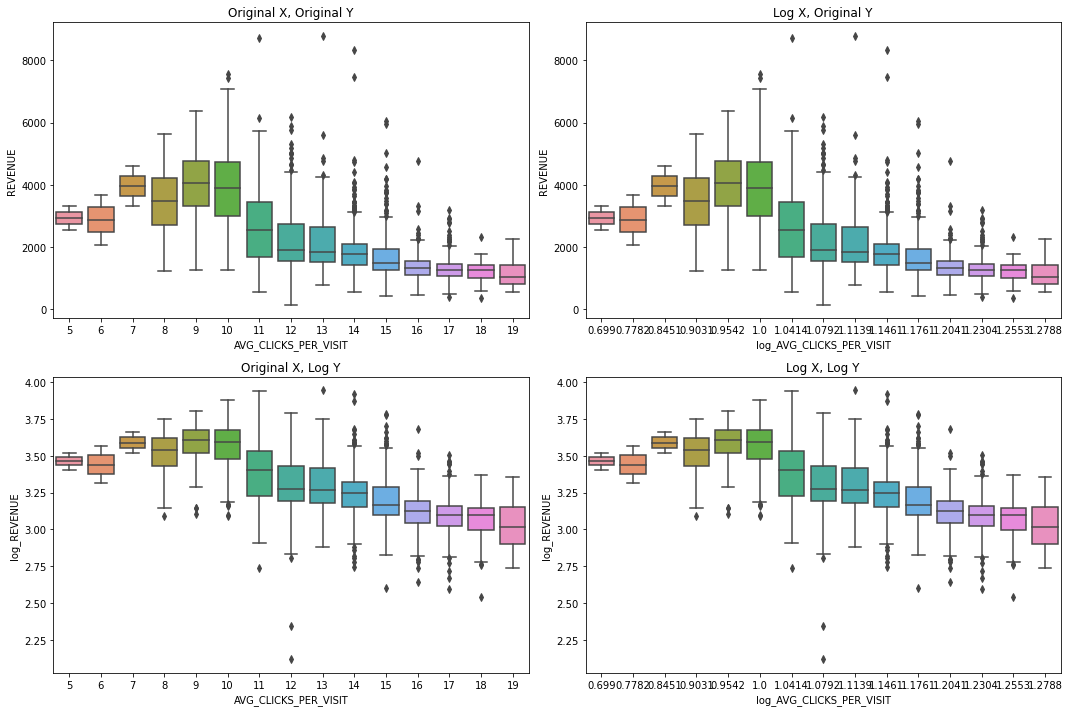

In [73]:
get_log_comparison(chef_df, 'AVG_CLICKS_PER_VISIT','log_AVG_CLICKS_PER_VISIT', 'REVENUE', 'log_REVENUE')

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<br><br>
<strong>Creating dummy variables</strong>

<br>
<h4>We have analyzed the box plots to create new dummy variables.</h4>
Based on the analysis of the box plots, we concluded that most of log transformations did not improve the linear relationships between the X variables and the response variable, therefore we will utilize we will test again the transformations when we test our model and for now just create new dummy variables for the cut-offs as follows:

'CONTACTS_W_CUSTOMER_SERVICE' - We will create a new dummy variable for contacts with customer service over 11 times, so 1 will be contacts below 11 and 0 contacts above that.

'AVG_MEALS_PER_CUSTOMER' - For average meals per customer, we will create a new dummy variable for averages under 10, so 1 will be when it’s below 10 and 0 for above.

'MASTER_CLASSES_ATTENDED' - For master classes attended, we will create a new dummy variable for attendance under 3, so 1 will be when it’s below 3 and 0 for above.

'MEDIAN_MEAL_RATING' - For median meals rating, we will create a new dummy variable for ratings under 5, so 1 will be when it’s below 5 and 0 for above.

'AVG_CLICKS_PER_VISIT' - For average clicks per visit, we will create a new dummy variable for visits over 10, so 1 will be when it’s over 10 and 0 for below.

In [74]:
# creating dummy variables:
chef_df['dummy_CONTACTS_W_CUSTOMER_SERVICE_UNDER_11']   = 0
chef_df['dummy_AVG_MEALS_PER_CUSTOMER_UNDER_10']      = 0
chef_df['dummy_MASTER_CLASSES_ATTENDED_UNDER_3']      = 0
chef_df['dummy_MEDIAN_MEAL_RATING_UNDER_5']      = 0
chef_df['dummy_AVG_CLICKS_PER_VISIT_OVER_10']      = 0


# iterating over each original column to
# change values in the new feature columns
for index, value in chef_df.iterrows(): #iterates over rows and columns
        
    if chef_df.loc[index, 'CONTACTS_W_CUSTOMER_SERVICE'] < 11:
        chef_df.loc[index, 'dummy_CONTACTS_W_CUSTOMER_SERVICE_UNDER_11'] = 1
        
    if chef_df.loc[index, 'AVG_MEALS_PER_CUSTOMER'] < 10:
        chef_df.loc[index, 'dummy_AVG_MEALS_PER_CUSTOMER_UNDER_10'] = 1

    if chef_df.loc[index, 'MASTER_CLASSES_ATTENDED'] < 3:
        chef_df.loc[index, 'dummy_MASTER_CLASSES_ATTENDED_UNDER_3'] = 1
        
    if chef_df.loc[index, 'MEDIAN_MEAL_RATING'] < 5:
        chef_df.loc[index, 'dummy_MEDIAN_MEAL_RATING_UNDER_5'] = 1
        
    if chef_df.loc[index, 'AVG_CLICKS_PER_VISIT'] > 10:
        chef_df.loc[index, 'dummy_AVG_CLICKS_PER_VISIT_OVER_10'] = 1


In [75]:
# checking results
chef_df[['dummy_CONTACTS_W_CUSTOMER_SERVICE_UNDER_11','dummy_AVG_MEALS_PER_CUSTOMER_UNDER_10',
         'dummy_MASTER_CLASSES_ATTENDED_UNDER_3','dummy_MEDIAN_MEAL_RATING_UNDER_5',
 'dummy_AVG_CLICKS_PER_VISIT_OVER_10']].head()

,dummy_CONTACTS_W_CUSTOMER_SERVICE_UNDER_11,dummy_AVG_MEALS_PER_CUSTOMER_UNDER_10,dummy_MASTER_CLASSES_ATTENDED_UNDER_3,dummy_MEDIAN_MEAL_RATING_UNDER_5,dummy_AVG_CLICKS_PER_VISIT_OVER_10
0,0,1,1,1,1
1,1,1,1,1,1
2,0,1,1,1,1
3,0,1,1,1,1
4,1,1,1,1,1


In [76]:
# developing final correlation matrix for the dummy variables
final_corr = chef_df.loc[:,['CONTACTS_W_CUSTOMER_SERVICE','dummy_CONTACTS_W_CUSTOMER_SERVICE_UNDER_11',
                            'AVG_MEALS_PER_CUSTOMER','dummy_AVG_MEALS_PER_CUSTOMER_UNDER_10',
                             'MASTER_CLASSES_ATTENDED','dummy_MASTER_CLASSES_ATTENDED_UNDER_3',
                            'MEDIAN_MEAL_RATING','dummy_MEDIAN_MEAL_RATING_UNDER_5',
                             'AVG_CLICKS_PER_VISIT','dummy_AVG_CLICKS_PER_VISIT_OVER_10', 'REVENUE', 'log_REVENUE']]\
                            .corr(method = 'pearson').round(decimals = 2)

final_corr.loc[['CONTACTS_W_CUSTOMER_SERVICE','dummy_CONTACTS_W_CUSTOMER_SERVICE_UNDER_11',
                    'AVG_MEALS_PER_CUSTOMER','dummy_AVG_MEALS_PER_CUSTOMER_UNDER_10',
                     'MASTER_CLASSES_ATTENDED','dummy_MASTER_CLASSES_ATTENDED_UNDER_3',
                    'MEDIAN_MEAL_RATING','dummy_MEDIAN_MEAL_RATING_UNDER_5',
                     'AVG_CLICKS_PER_VISIT','dummy_AVG_CLICKS_PER_VISIT_OVER_10'],
                   ['REVENUE', 'log_REVENUE']]

,REVENUE,log_REVENUE
CONTACTS_W_CUSTOMER_SERVICE,0.10,-0.04
dummy_CONTACTS_W_CUSTOMER_SERVICE_UNDER_11,0.36,0.52
AVG_MEALS_PER_CUSTOMER,0.44,0.45
dummy_AVG_MEALS_PER_CUSTOMER_UNDER_10,-0.03,-0.02
MASTER_CLASSES_ATTENDED,0.45,0.47
dummy_MASTER_CLASSES_ATTENDED_UNDER_3,-0.03,-0.03
MEDIAN_MEAL_RATING,0.61,0.65
dummy_MEDIAN_MEAL_RATING_UNDER_5,-0.04,-0.04
AVG_CLICKS_PER_VISIT,-0.55,-0.58
dummy_AVG_CLICKS_PER_VISIT_OVER_10,-0.50,-0.45



<br>
<h4>Conclusion for dummy creation</h4>
Based on the correlation, the dummy variables only improved CONTACTS_W_CUSTOMER_SERVICE.

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>
<h2>Base Modeling</h2><br>


To start our modeling we consider our feature engineering and therefore our new variables created. As per previous analysis, most of the dummy variables and log transformation created did not improved significantly the correlation with our response variable. So in this case we will decide the most optimal solution after running a couple of models first.

In [77]:
# Defining x_variables
chef_data_FULL = chef_df.drop(['REVENUE', 'log_REVENUE','NAME', 'EMAIL', 'FIRST_NAME', 'FAMILY_NAME',
                                 'MOBILE_NUMBER', 'log_MASTER_CLASSES_ATTENDED', 'email_domain', 'email_domain_group'],
                            axis = 1)

# preparing response variables
chef_target = chef_df.loc[ : , 'REVENUE']
chef_target_log = chef_df.loc[ : , 'log_REVENUE']

# FULL X-dataset (normal Y)
x_train_FULL, x_test_FULL, y_train_FULL, y_test_FULL = train_test_split(
            chef_data_FULL,     # x-variables
            chef_target,   # y-variable
            test_size = 0.25,
            random_state = 219)

# FULL X-dataset (log Y)
x_train_FULL_log, x_test_FULL_log, y_train_FULL_log, y_test_FULL_log = train_test_split(
            chef_data_FULL,     # x-variables
            chef_target_log,   # y-variable
            test_size = 0.25,
            random_state = 219)

# checking the shapes of the datasets
print(f"""
Training Data
-------------
X-side: {x_train_FULL.shape}
y-side: {y_train_FULL.shape}


Testing Data
------------
X-side: {x_test_FULL.shape}
y-side: {y_test_FULL.shape}
""")


Training Data
-------------
X-side: (1459, 35)
y-side: (1459,)


Testing Data
------------
X-side: (487, 35)
y-side: (487,)



<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>
<h3>OLS Regression</h3><br>

In [78]:
# looping to make x-variables suitable for statsmodels for the full model
for val in chef_data_FULL:
    print(f"{val} +")

CROSS_SELL_SUCCESS +
TOTAL_MEALS_ORDERED +
UNIQUE_MEALS_PURCH +
CONTACTS_W_CUSTOMER_SERVICE +
PRODUCT_CATEGORIES_VIEWED +
AVG_TIME_PER_SITE_VISIT +
CANCELLATIONS_BEFORE_NOON +
CANCELLATIONS_AFTER_NOON +
TASTES_AND_PREFERENCES +
PC_LOGINS +
MOBILE_LOGINS +
WEEKLY_PLAN +
EARLY_DELIVERIES +
LATE_DELIVERIES +
PACKAGE_LOCKER +
REFRIGERATED_LOCKER +
AVG_PREP_VID_TIME +
AVG_MEALS_PER_CUSTOMER +
MASTER_CLASSES_ATTENDED +
MEDIAN_MEAL_RATING +
AVG_CLICKS_PER_VISIT +
TOTAL_PHOTOS_VIEWED +
dummy_subscribe_to_weekly_plan +
dummy_view_photos +
dummy_junk_email +
dummy_professional_email +
log_CONTACTS_W_CUSTOMER_SERVICE +
log_AVG_MEALS_PER_CUSTOMER +
log_MEDIAN_MEAL_RATING +
log_AVG_CLICKS_PER_VISIT +
dummy_CONTACTS_W_CUSTOMER_SERVICE_UNDER_11 +
dummy_AVG_MEALS_PER_CUSTOMER_UNDER_10 +
dummy_MASTER_CLASSES_ATTENDED_UNDER_3 +
dummy_MEDIAN_MEAL_RATING_UNDER_5 +
dummy_AVG_CLICKS_PER_VISIT_OVER_10 +


In [79]:
# FULL MODEL
# merging X_train and y_train so that they can be used in statsmodels
chef_train_FULL = pd.concat([x_train_FULL, y_train_FULL], axis = 1)


# Step 1: build a model
lm_best = smf.ols(formula =  """REVENUE ~ CROSS_SELL_SUCCESS +
                                TOTAL_MEALS_ORDERED +
                                UNIQUE_MEALS_PURCH +
                                CONTACTS_W_CUSTOMER_SERVICE +
                                PRODUCT_CATEGORIES_VIEWED +
                                AVG_TIME_PER_SITE_VISIT +
                                CANCELLATIONS_BEFORE_NOON +
                                CANCELLATIONS_AFTER_NOON +
                                TASTES_AND_PREFERENCES +
                                PC_LOGINS +
                                MOBILE_LOGINS +
                                WEEKLY_PLAN +
                                EARLY_DELIVERIES +
                                LATE_DELIVERIES +
                                PACKAGE_LOCKER +
                                REFRIGERATED_LOCKER +
                                AVG_PREP_VID_TIME +
                                AVG_MEALS_PER_CUSTOMER +
                                MASTER_CLASSES_ATTENDED +
                                MEDIAN_MEAL_RATING +
                                AVG_CLICKS_PER_VISIT +
                                TOTAL_PHOTOS_VIEWED +
                                dummy_subscribe_to_weekly_plan +
                                dummy_view_photos +
                                dummy_junk_email +
                                dummy_professional_email +
                                log_CONTACTS_W_CUSTOMER_SERVICE +
                                log_AVG_MEALS_PER_CUSTOMER +
                                log_MEDIAN_MEAL_RATING +
                                log_AVG_CLICKS_PER_VISIT +
                                dummy_CONTACTS_W_CUSTOMER_SERVICE_UNDER_11 +
                                dummy_AVG_MEALS_PER_CUSTOMER_UNDER_10 +
                                dummy_MASTER_CLASSES_ATTENDED_UNDER_3 +
                                dummy_MEDIAN_MEAL_RATING_UNDER_5 +
                                dummy_AVG_CLICKS_PER_VISIT_OVER_10""",
                                            data = chef_train_FULL)


# Step 2: fit the model based on the data
results = lm_best.fit()

# Step 3: analyze the summary output
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                REVENUE   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.674
Method:                 Least Squares   F-statistic:                     87.31
Date:                Tue, 04 May 2021   Prob (F-statistic):               0.00
Time:                        16:50:34   Log-Likelihood:                -11480.
No. Observations:                1459   AIC:                         2.303e+04
Df Residuals:                    1423   BIC:                         2.322e+04
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
                                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

In [80]:
# Based on the most Full model, we created the most optimal based on the results and also removing duplicated columns
# like the original variables and it's dummy or log.

# merging X_train and y_train so that they can be used in statsmodels
chef_train_FULL = pd.concat([x_train_FULL, y_train_FULL], axis = 1)


# Step 1: build a model
lm_best = smf.ols(formula =  """REVENUE ~ TOTAL_MEALS_ORDERED +
                                UNIQUE_MEALS_PURCH +
                                AVG_PREP_VID_TIME +
                                TOTAL_PHOTOS_VIEWED +
                                dummy_CONTACTS_W_CUSTOMER_SERVICE_UNDER_11 +
                                dummy_AVG_MEALS_PER_CUSTOMER_UNDER_10 +
                                dummy_MEDIAN_MEAL_RATING_UNDER_5 +
                                dummy_AVG_CLICKS_PER_VISIT_OVER_10""",
                                            data = chef_train_FULL)

# x_variables of the final model
x_variables = ['TOTAL_MEALS_ORDERED',
                'UNIQUE_MEALS_PURCH',
                'AVG_PREP_VID_TIME',
                'TOTAL_PHOTOS_VIEWED',
                'dummy_CONTACTS_W_CUSTOMER_SERVICE_UNDER_11',
                'dummy_AVG_MEALS_PER_CUSTOMER_UNDER_10',
                'dummy_MEDIAN_MEAL_RATING_UNDER_5',
                'dummy_AVG_CLICKS_PER_VISIT_OVER_10']

# Step 2: fit the model based on the data
results = lm_best.fit()

# Step 3: analyze the summary output
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                REVENUE   R-squared:                       0.620
Model:                            OLS   Adj. R-squared:                  0.618
Method:                 Least Squares   F-statistic:                     295.5
Date:                Tue, 04 May 2021   Prob (F-statistic):          4.50e-298
Time:                        16:50:34   Log-Likelihood:                -11611.
No. Observations:                1459   AIC:                         2.324e+04
Df Residuals:                    1450   BIC:                         2.329e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

In [81]:
# Preparing a DataFrame based the the analysis above
ols_data   = chef_df.loc[ : , x_variables]

# OLS p-value x-dataset (normal Y)
x_train_OLS, x_test_OLS, y_train_OLS, y_test_OLS = train_test_split(
            ols_data,         # x-variables
            chef_target,   # y-variable
            test_size = 0.25,
            random_state = 219)


# INSTANTIATING a model object
lr = LinearRegression()


# FITTING to the training data
lr_fit = lr.fit(x_train_OLS, y_train_OLS)


# PREDICTING on new data
lr_pred = lr_fit.predict(x_test_OLS)


# SCORING the results
print('OLS Training Score :', lr.score(x_train_OLS, y_train_OLS).round(4))
print('OLS Testing Score  :', lr.score(x_test_OLS, y_test_OLS).round(4))


# saving scoring data for future use
lr_train_score = lr.score(x_train_OLS, y_train_OLS).round(4) # using R-square
lr_test_score  = lr.score(x_test_OLS, y_test_OLS).round(4)   # using R-square


# displaying and saving the gap between training and testing
print('OLS Train-Test Gap :', abs(lr_train_score - lr_test_score).round(4))
lr_test_gap = abs(lr_train_score - lr_test_score).round(4)

OLS Training Score : 0.6198
OLS Testing Score  : 0.6127
OLS Train-Test Gap : 0.0071


In [82]:
# zipping each feature name to its coefficient
lr_model_values = zip(ols_data[x_variables].columns,
                      lr_fit.coef_.round(decimals = 2))


# setting up a placeholder list to store model features
lr_model_lst = [('intercept', lr_fit.intercept_.round(decimals = 2))]


# printing out each feature-coefficient pair one by one
for val in lr_model_values:
    lr_model_lst.append(val)
    

# checking the results
for pair in lr_model_lst:
    print(pair)

('intercept', -858.9)
('TOTAL_MEALS_ORDERED', 5.65)
('UNIQUE_MEALS_PURCH', -68.85)
('AVG_PREP_VID_TIME', 8.42)
('TOTAL_PHOTOS_VIEWED', 0.73)
('dummy_CONTACTS_W_CUSTOMER_SERVICE_UNDER_11', 359.09)
('dummy_AVG_MEALS_PER_CUSTOMER_UNDER_10', 1049.29)
('dummy_MEDIAN_MEAL_RATING_UNDER_5', 979.34)
('dummy_AVG_CLICKS_PER_VISIT_OVER_10', -895.46)


In [83]:
# Based on the most optimal OLS model we also tried using log on the revenue

# merging X_train and y_train so that they can be used in statsmodels
chef_train_FULL_log = pd.concat([x_train_FULL_log, y_train_FULL_log], axis = 1)


# Step 1: build a model
lm_best_log = smf.ols(formula =  """log_REVENUE ~ TOTAL_MEALS_ORDERED +
                                UNIQUE_MEALS_PURCH +
                                AVG_PREP_VID_TIME +
                                TOTAL_PHOTOS_VIEWED +
                                dummy_CONTACTS_W_CUSTOMER_SERVICE_UNDER_11 +
                                dummy_AVG_MEALS_PER_CUSTOMER_UNDER_10 +
                                dummy_MEDIAN_MEAL_RATING_UNDER_5 +
                                dummy_AVG_CLICKS_PER_VISIT_OVER_10""",
                                            data = chef_train_FULL_log)


# Step 2: fit the model based on the data
results = lm_best_log.fit()

# Step 3: analyze the summary output
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            log_REVENUE   R-squared:                       0.665
Model:                            OLS   Adj. R-squared:                  0.664
Method:                 Least Squares   F-statistic:                     360.6
Date:                Tue, 04 May 2021   Prob (F-statistic):               0.00
Time:                        16:50:35   Log-Likelihood:                 1010.4
No. Observations:                1459   AIC:                            -2003.
Df Residuals:                    1450   BIC:                            -1955.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

In [84]:
# OLS p-value x-dataset (log Y)
x_train_OLS_log, x_test_OLS_log, y_train_OLS_log, y_test_OLS_log = train_test_split(
            ols_data,         # x-variables
            chef_target_log,   # y-variable
            test_size = 0.25,
            random_state = 219)


# INSTANTIATING a model object
lr_log = LinearRegression()


# FITTING to the training data
lr_fit_log = lr_log.fit(x_train_OLS, y_train_OLS_log)


# PREDICTING on new data
lr_pred_log = lr_fit_log.predict(x_test_OLS)


# SCORING the results
print('OLS_log Training Score :', lr_log.score(x_train_OLS, y_train_OLS_log).round(4))
print('OLS_log Testing Score  :', lr_log.score(x_test_OLS, y_test_OLS_log).round(4))


# saving scoring data for future use
lr_train_score_log = lr_log.score(x_train_OLS, y_train_OLS_log).round(4) # using R-square
lr_test_score_log  = lr_log.score(x_test_OLS, y_test_OLS_log).round(4)   # using R-square


# displaying and saving the gap between training and testing
print('OLS_log Train-Test Gap :', abs(lr_train_score_log - lr_test_score_log).round(4))
lr_test_gap_log = abs(lr_train_score_log - lr_test_score_log).round(4)

OLS_log Training Score : 0.6655
OLS_log Testing Score  : 0.6521
OLS_log Train-Test Gap : 0.0134


In [85]:
# zipping each feature name to its coefficient
lr_model_values_log = zip(ols_data[x_variables].columns,
                      lr_fit_log.coef_.round(decimals = 2))


# setting up a placeholder list to store model features
lr_model_lst_log = [('intercept', lr_fit_log.intercept_.round(decimals = 2))]


# printing out each feature-coefficient pair one by one
for val in lr_model_values_log:
    lr_model_lst_log.append(val)
    

# checking the results
for pair in lr_model_lst_log:
    print(pair)

('intercept', 2.63)
('TOTAL_MEALS_ORDERED', 0.0)
('UNIQUE_MEALS_PURCH', -0.01)
('AVG_PREP_VID_TIME', 0.0)
('TOTAL_PHOTOS_VIEWED', 0.0)
('dummy_CONTACTS_W_CUSTOMER_SERVICE_UNDER_11', 0.19)
('dummy_AVG_MEALS_PER_CUSTOMER_UNDER_10', 0.19)
('dummy_MEDIAN_MEAL_RATING_UNDER_5', 0.14)
('dummy_AVG_CLICKS_PER_VISIT_OVER_10', -0.13)


<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>
<h3>Lasso Regression</h3><br>

In [86]:
# INSTANTIATING a model object
lasso_model = sklearn.linear_model.Lasso(alpha = 1.0,
                                         normalize = True) # default magitude


# FITTING to the training data
lasso_fit = lasso_model.fit(x_train_FULL, y_train_FULL)


# PREDICTING on new data
lasso_pred = lasso_fit.predict(x_test_FULL)


# SCORING the results
print('Lasso Training Score :', lasso_model.score(x_train_FULL, y_train_FULL).round(4))
print('Lasso Testing Score  :', lasso_model.score(x_test_FULL, y_test_FULL).round(4))


## the following code has been provided for you ##

# saving scoring data for future use
lasso_train_score = lasso_model.score(x_train_FULL, y_train_FULL).round(4) # using R-square
lasso_test_score  = lasso_model.score(x_test_FULL, y_test_FULL).round(4)   # using R-square


# displaying and saving the gap between training and testing
print('Lasso Train-Test Gap :', abs(lasso_train_score - lasso_test_score).round(4))
lasso_test_gap = abs(lasso_train_score - lasso_test_score).round(4)

Lasso Training Score : 0.6556
Lasso Testing Score  : 0.6664
Lasso Train-Test Gap : 0.0108


In [87]:
# zipping each feature name to its coefficient
lasso_model_values = zip(chef_data_FULL.columns, lasso_fit.coef_.round(decimals = 2))


# setting up a placeholder list to store model features
lasso_model_lst = [('intercept', lasso_fit.intercept_.round(decimals = 2))]


# printing out each feature-coefficient pair one by one
for val in lasso_model_values:
    lasso_model_lst.append(val)
    

# checking the results
for pair in lasso_model_lst:
    print(pair)

('intercept', -1393.08)
('CROSS_SELL_SUCCESS', -0.0)
('TOTAL_MEALS_ORDERED', 4.49)
('UNIQUE_MEALS_PURCH', -50.57)
('CONTACTS_W_CUSTOMER_SERVICE', 0.0)
('PRODUCT_CATEGORIES_VIEWED', 0.0)
('AVG_TIME_PER_SITE_VISIT', -0.0)
('CANCELLATIONS_BEFORE_NOON', 0.0)
('CANCELLATIONS_AFTER_NOON', -0.0)
('TASTES_AND_PREFERENCES', 0.0)
('PC_LOGINS', -0.0)
('MOBILE_LOGINS', -0.0)
('WEEKLY_PLAN', 0.0)
('EARLY_DELIVERIES', -0.0)
('LATE_DELIVERIES', 0.0)
('PACKAGE_LOCKER', -0.0)
('REFRIGERATED_LOCKER', -0.0)
('AVG_PREP_VID_TIME', 6.01)
('AVG_MEALS_PER_CUSTOMER', -0.0)
('MASTER_CLASSES_ATTENDED', 141.29)
('MEDIAN_MEAL_RATING', 229.55)
('AVG_CLICKS_PER_VISIT', -0.0)
('TOTAL_PHOTOS_VIEWED', 0.47)
('dummy_subscribe_to_weekly_plan', -0.0)
('dummy_view_photos', 0.0)
('dummy_junk_email', -0.0)
('dummy_professional_email', -0.0)
('log_CONTACTS_W_CUSTOMER_SERVICE', 947.34)
('log_AVG_MEALS_PER_CUSTOMER', -0.0)
('log_MEDIAN_MEAL_RATING', 0.0)
('log_AVG_CLICKS_PER_VISIT', -0.0)
('dummy_CONTACTS_W_CUSTOMER_SERVICE_UND

In [88]:
## This code may have to be run more than once ##

# dropping coefficients that are equal to zero

# printing out each feature-coefficient pair one by one
for feature, coefficient in lasso_model_lst:
        
        if coefficient == 0:
            lasso_model_lst.remove((feature, coefficient))

            
# checking the results
for pair in lasso_model_lst:
    print(pair)

('intercept', -1393.08)
('TOTAL_MEALS_ORDERED', 4.49)
('UNIQUE_MEALS_PURCH', -50.57)
('PRODUCT_CATEGORIES_VIEWED', 0.0)
('CANCELLATIONS_BEFORE_NOON', 0.0)
('TASTES_AND_PREFERENCES', 0.0)
('MOBILE_LOGINS', -0.0)
('EARLY_DELIVERIES', -0.0)
('PACKAGE_LOCKER', -0.0)
('AVG_PREP_VID_TIME', 6.01)
('MASTER_CLASSES_ATTENDED', 141.29)
('MEDIAN_MEAL_RATING', 229.55)
('TOTAL_PHOTOS_VIEWED', 0.47)
('dummy_view_photos', 0.0)
('dummy_professional_email', -0.0)
('log_CONTACTS_W_CUSTOMER_SERVICE', 947.34)
('log_MEDIAN_MEAL_RATING', 0.0)
('dummy_CONTACTS_W_CUSTOMER_SERVICE_UNDER_11', 454.4)
('dummy_AVG_MEALS_PER_CUSTOMER_UNDER_10', 423.09)
('dummy_MASTER_CLASSES_ATTENDED_UNDER_3', 32.53)
('dummy_MEDIAN_MEAL_RATING_UNDER_5', 574.67)
('dummy_AVG_CLICKS_PER_VISIT_OVER_10', -539.55)


<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>
<h3>ARD Model</h3><br>

In [89]:
# INSTANTIATING a model object
ard_model = linear_model.ARDRegression(normalize=False)


# FITTING the training data
ard_fit = ard_model.fit(x_train_FULL, y_train_FULL)


# PREDICTING on new data
ard_pred = ard_fit.predict(x_test_FULL)


print('Training Score:', ard_model.score(x_train_FULL, y_train_FULL).round(4))
print('Testing Score :',  ard_model.score(x_test_FULL, y_test_FULL).round(4))


# saving scoring data for future use
ard_train_score = ard_model.score(x_train_FULL, y_train_FULL).round(4)
ard_test_score  = ard_model.score(x_test_FULL, y_test_FULL).round(4)


# displaying and saving the gap between training and testing
print('ARD Train-Test Gap :', abs(ard_train_score - ard_test_score).round(4))
ard_test_gap = abs(ard_train_score - ard_test_score).round(4)

Training Score: 0.6796
Testing Score : 0.701
ARD Train-Test Gap : 0.0214


In [90]:
# zipping each feature name to its coefficient
ard_model_values = zip(chef_data_FULL.columns, ard_fit.coef_.round(decimals = 5))


# setting up a placeholder list to store model features
ard_model_lst = [('intercept', ard_fit.intercept_.round(decimals = 2))]


# printing out each feature-coefficient pair one by one
for val in ard_model_values:
    ard_model_lst.append(val)
    

# checking the results
for pair in ard_model_lst:
    print(pair)

('intercept', -3467.91)
('CROSS_SELL_SUCCESS', -66.10483)
('TOTAL_MEALS_ORDERED', 4.27029)
('UNIQUE_MEALS_PURCH', -64.28222)
('CONTACTS_W_CUSTOMER_SERVICE', 114.85366)
('PRODUCT_CATEGORIES_VIEWED', 0.00168)
('AVG_TIME_PER_SITE_VISIT', -0.64673)
('CANCELLATIONS_BEFORE_NOON', 0.00214)
('CANCELLATIONS_AFTER_NOON', -0.00155)
('TASTES_AND_PREFERENCES', 7.26473)
('PC_LOGINS', -0.00063)
('MOBILE_LOGINS', -4.71557)
('WEEKLY_PLAN', 0.00135)
('EARLY_DELIVERIES', -0.00219)
('LATE_DELIVERIES', 0.00097)
('PACKAGE_LOCKER', -0.00128)
('REFRIGERATED_LOCKER', -0.00105)
('AVG_PREP_VID_TIME', 7.73769)
('AVG_MEALS_PER_CUSTOMER', -27.93541)
('MASTER_CLASSES_ATTENDED', 177.33828)
('MEDIAN_MEAL_RATING', 723.98051)
('AVG_CLICKS_PER_VISIT', 0.00107)
('TOTAL_PHOTOS_VIEWED', 0.43896)
('dummy_subscribe_to_weekly_plan', -3.74792)
('dummy_view_photos', -0.00073)
('dummy_junk_email', -0.00103)
('dummy_professional_email', -0.00031)
('log_CONTACTS_W_CUSTOMER_SERVICE', -110.94184)
('log_AVG_MEALS_PER_CUSTOMER', -354.9

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>
<h3>KNN Model</h3><br>

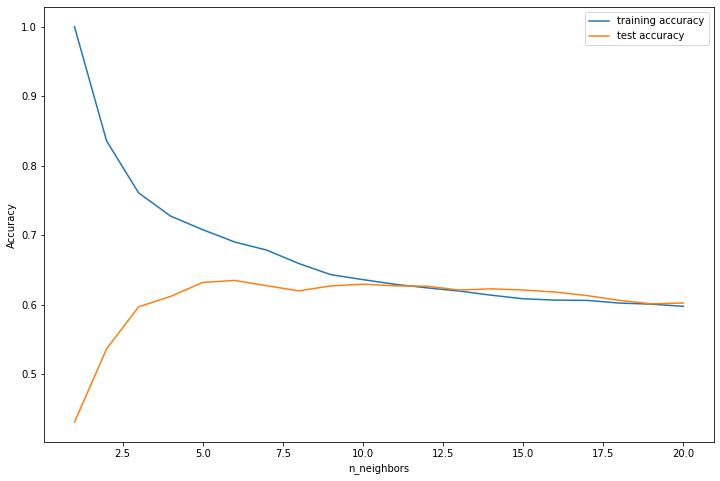

In [91]:
# creating lists for training set accuracy and test set accuracy
training_accuracy = []
test_accuracy     = []

# building a visualization of 1 to 50 neighbors
neighbors_settings = range(1, 21)


for n_neighbors in neighbors_settings:
    # Building the model
    clf = KNeighborsRegressor(n_neighbors = n_neighbors)
    clf.fit(x_train_FULL, y_train_FULL)
    
    # Recording the training set accuracy
    training_accuracy.append(clf.score(x_train_FULL, y_train_FULL))
    
    # Recording the generalization accuracy
    test_accuracy.append(clf.score(x_test_FULL, y_test_FULL))


# plotting the visualization
fig, ax = plt.subplots(figsize=(12,8))
plt.plot(neighbors_settings, training_accuracy, label = "training accuracy")
plt.plot(neighbors_settings, test_accuracy, label = "test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.show()

In [92]:
# finding the optimal number of neighbors
opt_neighbors = test_accuracy.index(max(test_accuracy)) + 1
print(f"""The optimal number of neighbors is {opt_neighbors}""")

The optimal number of neighbors is 6


In [93]:
# INSTANTIATING a KNN model object
knn_reg = KNeighborsRegressor(algorithm = 'auto',
                              n_neighbors = opt_neighbors)


# FITTING to the training data
knn_fit = knn_reg.fit(x_train_FULL, y_train_FULL)


# PREDICTING on new data
knn_reg_pred = knn_fit.predict(x_test_FULL)


# SCORING the results
print('KNN Training Score:', knn_reg.score(x_train_FULL, y_train_FULL).round(4))
print('KNN Testing Score :',  knn_reg.score(x_test_FULL, y_test_FULL).round(4))


# saving scoring data for future use
knn_reg_score_train = knn_reg.score(x_train_FULL, y_train_FULL).round(4)
knn_reg_score_test  = knn_reg.score(x_test_FULL, y_test_FULL).round(4)


# displaying and saving the gap between training and testing
print('KNN Train-Test Gap:', abs(knn_reg_score_train - knn_reg_score_test).round(4))
knn_reg_test_gap = abs(knn_reg_score_train - knn_reg_score_test).round(4)

KNN Training Score: 0.6904
KNN Testing Score : 0.6351
KNN Train-Test Gap: 0.0553


In [94]:
# INSTANTIATING a StandardScaler() object
scaler = StandardScaler()


# FITTING the scaler with the data
scaler.fit(chef_data_FULL)


# TRANSFORMING our data after fit
X_scaled = scaler.transform(chef_data_FULL)


# converting scaled data into a DataFrame
X_scaled_df = pd.DataFrame(X_scaled)


# checking the results
X_scaled_df.describe().round(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34
count,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.0,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00
mean,-0.00,0.00,-0.00,0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00,-0.00,0.00,0.00,0.00,0.00,0.00,-0.00,0.00,0.00,0.00,0.0,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.0,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-1.45,-1.15,-1.56,-2.62,-1.44,-1.43,-0.91,-0.38,-1.58,-2.61,-2.80,-0.83,-0.64,-1.08,-0.74,-0.36,-2.37,-2.22,-0.94,-2.37,-3.65,-0.59,-1.78,-0.84,-0.5,-0.75,-5.60,-3.88,-3.08,-5.38,-2.83,-12.19,-17.98,-12.19,-3.05
25%,-1.45,-0.64,-0.76,-0.87,-0.78,-0.44,-0.91,-0.38,-1.58,-0.89,-0.90,-0.76,-0.64,-0.72,-0.74,-0.36,-0.73,-0.93,-0.94,-1.05,-0.65,-0.59,0.56,-0.84,-0.5,-0.75,-0.83,-0.89,-0.91,-0.56,0.35,0.08,0.06,0.08,0.33
50%,0.69,-0.26,0.04,0.01,-0.13,-0.09,-0.26,-0.38,0.63,0.83,-0.90,-0.32,-0.64,-0.35,-0.74,-0.36,-0.10,-0.28,0.62,0.27,-0.22,-0.59,0.56,-0.84,-0.5,-0.75,0.17,-0.11,0.36,-0.12,0.35,0.08,0.06,0.08,0.33
75%,0.69,0.37,0.84,0.45,0.86,0.28,0.38,-0.38,0.63,0.83,0.99,0.12,0.65,0.38,1.35,-0.36,0.47,0.36,0.62,0.27,0.64,0.37,0.56,1.19,-0.5,1.34,0.57,0.50,0.36,0.66,0.35,0.08,0.06,0.08,0.33
max,0.69,7.57,5.63,4.83,1.52,24.81,7.48,6.56,0.63,2.56,2.89,3.00,3.24,5.84,1.35,2.80,8.37,4.24,3.73,2.92,2.35,8.25,0.56,1.19,2.0,1.34,2.97,2.64,1.96,1.96,0.35,0.08,0.06,0.08,0.33


In [95]:
# INSTANTIATING a KNN model object
knn_reg_log = KNeighborsRegressor(algorithm = 'auto',
                              n_neighbors = opt_neighbors)


# FITTING to the training data
knn_fit_log = knn_reg_log.fit(x_train_FULL, y_train_FULL_log)


# PREDICTING on new data
knn_reg_pred_log = knn_fit_log.predict(x_test_FULL)


# SCORING the results
print('KNN Training Score:', knn_reg_log.score(x_train_FULL, y_train_FULL_log).round(4))
print('KNN Testing Score :',  knn_reg_log.score(x_test_FULL, y_test_FULL_log).round(4))


# saving scoring data for future use
knn_reg_score_train_log = knn_reg_log.score(x_train_FULL, y_train_FULL_log).round(4)
knn_reg_score_test_log  = knn_reg_log.score(x_test_FULL, y_test_FULL_log).round(4)


# displaying and saving the gap between training and testing
print('KNN_log Train-Test Gap:', abs(knn_reg_score_train_log - knn_reg_score_test_log).round(4))
knn_reg_test_gap_log = abs(knn_reg_score_train_log - knn_reg_score_test_log).round(4)

KNN Training Score: 0.7259
KNN Testing Score : 0.6547
KNN_log Train-Test Gap: 0.0712


<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>
<h3>KNN Standard Model</h3><br>

In [96]:
# KNN Standardized test and training
X_train_STAND, X_test_STAND, y_train_STAND, y_test_STAND = train_test_split(
            X_scaled_df,
            chef_target,
            test_size = 0.25,
            random_state = 219)

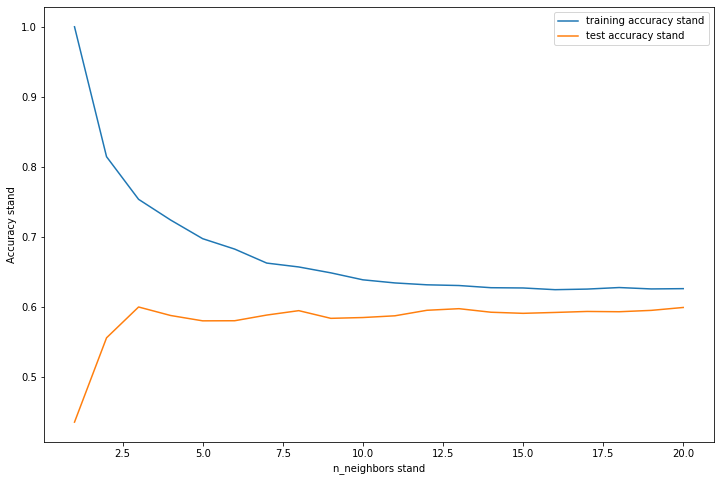

The optimal number of neighbors is 3


In [97]:
# creating lists for training set accuracy and test set accuracy
training_accuracy_STAND = []
test_accuracy_STAND = []


# building a visualization of 1 to 50 neighbors
neighbors_settings_STAND = range(1, 21)


for n_neighbors in neighbors_settings_STAND:
    # Building the model
    clf = KNeighborsRegressor(n_neighbors = n_neighbors)
    clf.fit(X_train_STAND, y_train_STAND)
    
    # Recording the training set accuracy
    training_accuracy_STAND.append(clf.score(X_train_STAND, y_train_STAND))
    
    # Recording the generalization accuracy
    test_accuracy_STAND.append(clf.score(X_test_STAND, y_test_STAND))


# plotting the visualization
fig, ax = plt.subplots(figsize=(12,8))
plt.plot(neighbors_settings, training_accuracy_STAND, label = "training accuracy stand")
plt.plot(neighbors_settings, test_accuracy_STAND,     label = "test accuracy stand")
plt.ylabel("Accuracy stand")
plt.xlabel("n_neighbors stand")
plt.legend()
plt.show()


# finding the optimal number of neighbors
opt_neighbors_STAND = test_accuracy_STAND.index(max(test_accuracy_STAND)) + 1
print(f"""The optimal number of neighbors is {opt_neighbors_STAND}""")

In [98]:
# INSTANTIATING a model with the optimal number of neighbors
knn_stand = KNeighborsRegressor(algorithm = 'auto',
                                n_neighbors = 10)



# FITTING the model based on the training data
knn_stand_fit = knn_stand.fit(X_train_STAND, y_train_STAND)



# PREDITCING on new data
knn_stand_pred = knn_stand_fit.predict(X_test_STAND)



# SCORING the results
print('KNN Training Score:', knn_stand.score(X_train_STAND, y_train_STAND).round(4))
print('KNN Testing Score :',  knn_stand.score(X_test_STAND, y_test_STAND).round(4))


# saving scoring data for future use
knn_stand_score_train = knn_stand.score(X_train_STAND, y_train_STAND).round(4)
knn_stand_score_test  = knn_stand.score(X_test_STAND, y_test_STAND).round(4)


# displaying and saving the gap between training and testing
print('KNN Train-Test Gap:', abs(knn_stand_score_train - knn_stand_score_test).round(4))
knn_stand_test_gap = abs(knn_stand_score_train - knn_stand_score_test).round(4)

KNN Training Score: 0.6389
KNN Testing Score : 0.585
KNN Train-Test Gap: 0.0539


<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>
<h3>Model comparison</h3><br>

In [99]:
# comparing results

print(f"""
Model           Train Score                 Test Score
-----           -----------                 ----------
OLS             {lr_train_score}                      {lr_test_score}
OLS (y_log)     {lr_train_score_log}                      {lr_test_score_log}
Lasso           {lasso_train_score}                      {lasso_test_score}
ARD             {ard_train_score}                      {ard_test_score}
KNN             {knn_reg_score_train}                      {knn_reg_score_test}
KNN (y-log)     {knn_reg_score_train_log}                      {knn_reg_score_test_log}
KNN (stand)     {knn_stand_score_train}                      {knn_stand_score_test}
""")


# creating a dictionary for model results
model_performance = {
    
    'Model Type'    : ['OLS', 'OLS (y_log)', 'Lasso', 'ARD', 'KNN', 'KNN (y_log)', 'KNN (stand)'],
           
    'Training' : [lr_train_score, lr_train_score_log, lasso_train_score,
                                   ard_train_score, knn_reg_score_train, knn_reg_score_train_log, knn_stand_score_train],
           
    'Testing'  : [lr_test_score, lr_test_score_log, lasso_test_score,
                                   ard_test_score, knn_reg_score_test, knn_reg_score_test_log, knn_stand_score_test],
                    
    'Train-Test Gap' : [lr_test_gap, lr_test_gap_log, lasso_test_gap,
                                        ard_test_gap, knn_reg_test_gap, knn_reg_test_gap_log, knn_stand_test_gap],
                    
    'Model Size' : [len(lr_model_lst), len(lr_model_lst_log),len(lasso_model_lst),
                                    len(ard_model_lst), "NA", "NA", "NA"],
                    
    'Model' : [lr_model_lst, lr_model_lst_log ,lasso_model_lst, ard_model_lst, "NA", "NA", "NA"]}


# converting model_performance into a DataFrame
model_performance = pd.DataFrame(model_performance)


# # sending model results to Excel
# model_performance.to_excel('./model_results/linear_model_performance.xlsx',
#                            index = False)


Model           Train Score                 Test Score
-----           -----------                 ----------
OLS             0.6198                      0.6127
OLS (y_log)     0.6655                      0.6521
Lasso           0.6556                      0.6664
ARD             0.6796                      0.701
KNN             0.6904                      0.6351
KNN (y-log)     0.7259                      0.6547
KNN (stand)     0.6389                      0.585



FileNotFoundError: [Errno 2] No such file or directory: './model_results/linear_model_performance.xlsx'

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<br><h2>Conclusion</h2>

Based on all of the analysis made, and after refactoring all of the models and generate a table of comparison, we have decided to go with the OLS without log on Revenue. Even though ARD has the highest test score, and KNN the highest training score, we opt out of those because, ARD showed us a higher complexity in terms of model size and a higher train-test gap. KNN showed a huged gap between training and testing, also KNN with standard data showed a worse result. This way, OLS with regular Revenue is our best option as it shows the second highest test score, an acceptable train-test gap and also shows less complexity in terms of model size.

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />